In [ ]:
import os
import json
import numpy as np
import pandas as pd
from nltk import sent_tokenize
from nltk import word_tokenize
import nltk

In [ ]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# 그래프로 나타내기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic.TTF')

import matplotlib.ticker as ticker

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
skeleton_data_path = '/content/drive/MyDrive/논문작성_실험/train_skeletons_before.json'

Mounted at /content/drive


In [ ]:
with open(skeleton_data_path, "r", encoding="utf-8") as skeleton_json_file:
    data = json.load(skeleton_json_file)

##전처리 시작##

In [ ]:
# 구두점 / 불용어 제거
import string
stopwords = nltk.corpus.stopwords.words("english")
result = ''
result_list = []
i=0
for idx, sentence in enumerate(data):
    for word in sentence['persona'].split():
        word = word.strip(string.punctuation)
        if word not in stopwords:
            result += word + ' '
    
    result = result.strip()
    result_list.append(result)
    result = ''

In [ ]:
personadict = {}
for idx, sentence in enumerate(result_list):
    personadict[sentence] = len(sentence.split())
df = pd.DataFrame({'Persona' : personadict.keys(), 'length': personadict.values()})
df = df.sort_values(by='length').reset_index(drop=True)
grouped = df.groupby('length')
grouped.first()

,Persona
length,
1,artist
2,looking job
3,youngest 8 kids
4,favorite musician charlie daniels
5,favorite tv show silicon valley
6,recite movie young frankenstein word word
7,like place blame people even know fault
8,write short stories document tab use prompting...
9,someday become famous animator work big compan...


In [ ]:
grouped.count(), grouped.count().sum()

(        Persona
 length         
 1           115
 2           707
 3          1112
 4           765
 5           372
 6           165
 7            69
 8            26
 9             8
 10            2
 11            2
 17            1, Persona    3344
 dtype: int64)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
findfont: Font family ['NanumGothic.TTF'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic.TTF'] not found. Falling back to DejaVu Sans.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


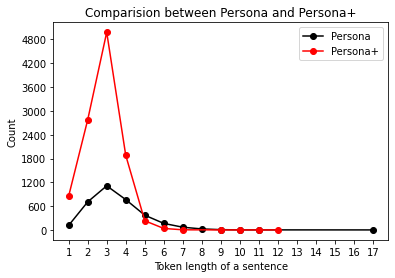

In [ ]:
token_length_p = [1, 2, 3, 4, 5, 6, 7, 8, 9 , 10, 11, 17]
token_number_p = [115, 707, 1112, 765, 372, 165, 69, 26, 8, 2, 2, 1] #페르소나 총 갯수 3343
token_length_exp = [1, 2, 3, 4, 5, 6, 7, 9 , 10, 11, 12]
token_number_exp = [854, 2774, 4981, 1881, 232, 38, 4, 1, 1, 1, 1] #확장 페르소나 총 갯수 10768

plt.plot(token_length_p, token_number_p, color='black', marker='o', linestyle='solid', label='Persona')
plt.plot(token_length_exp, token_number_exp, color='red', marker='o', linestyle='solid', label='Persona+')
plt.legend()
plt.title('Comparision between Persona and Persona+')
plt.ylabel('Count')
plt.xlabel('Token length of a sentence')
ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(600))
plt.savefig('Comparision_p_exp.eps', dpi=1000)

#스켈레톤 분석
평균 백그라운드 토큰 길이 4.3 / 평균 블랭크 길이 1.6

#골드 뉴골드 분석

In [ ]:
#--------- 골드 불용어 처리 -----------#
with open(skeleton_data_path, "r", encoding="utf-8") as skeleton_json_file:
    data = json.load(skeleton_json_file)

stopwords = nltk.corpus.stopwords.words("english")
result = ''
result_list = []
i=0
for idx, sentence in enumerate(data):
    for word in sentence['gold'].split():
        word = word.strip(string.punctuation)
        if word not in stopwords:
            result += word + ' '
    
    result = result.strip()
    result_list.append(result)
    result = ''

golddict = {}
for idx, sentence in enumerate(result_list):
    golddict[sentence] = len(sentence.split())

df = pd.DataFrame({'gold' : golddict.keys(), 'length': golddict.values()})
df = df.sort_values(by='length').reset_index(drop=True)
grouped = df.groupby('length')

In [ ]:
grouped.count(), grouped.count().sum()

(        gold
 length      
 0          1
 1         22
 2        175
 3        741
 4       1477
 5       2138
 6       2408
 7       1934
 8       1159
 9        539
 10       160
 11        43
 12         9
 13         1, gold    10807
 dtype: int64)

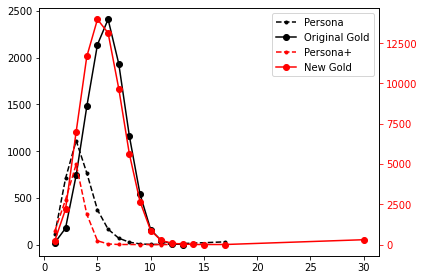

In [ ]:
token_length_p = [1, 2, 3, 4, 5, 6, 7, 8, 9 , 10, 11, 17]
token_number_p = [115, 707, 1112, 765, 372, 165, 69, 26, 8, 2, 2, 30] #페르소나 총 갯수 3343
token_length = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ,11, 12, 13]
token_number = [22, 175, 741, 1477, 2138, 2408, 1934, 1159, 539, 160, 43, 9, 1]

token_length_exp = [1, 2, 3, 4, 5, 6, 7, 9 , 10, 11, 12]
token_number_exp = [854, 2774, 4981, 1881, 232, 38, 4, 1, 1, 1, 1] #확장 페르소나 총 갯수 10768
token_length_new = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11 ,12, 13, 14, 15, 17, 30]
token_number_new = [251, 2188, 7003, 11670, 13972, 13128, 9677, 5613, 2663, 871, 253, 79, 31, 5, 2, 3, 300]

fig, axe1 = plt.subplots()
axe2 = axe1.twinx()

persona1 = axe1.plot(token_length_p, token_number_p, color='black', marker='.', linestyle='--', label='Persona')
gold1 = axe1.plot(token_length, token_number, color='black', marker='o', linestyle='solid', label="Original Gold")

persona2 = axe2.plot(token_length_exp, token_number_exp, color='red', marker='.', linestyle='--', label='Persona+')
gold2 = axe2.plot(token_length_new, token_number_new, color='red', marker='o', linestyle='solid', label="New Gold")

# axe1.set_ylabel('Count for Black', fontsize=14, color='black')
# axe2.set_ylabel('Count for Red', fontsize=14, color='red')
axe2.yaxis.label.set_color('red')
axe2.tick_params(axis='y', colors = 'red', color = 'red')


axe1.xaxis.set_major_locator(ticker.MultipleLocator(5))
# axe1.yaxis.set_major_locator(ticker.MultipleLocator(400))
axe2.yaxis.set_major_locator(ticker.MultipleLocator(2500))

total = persona1 + gold1 + persona2 + gold2
labels = [l.get_label() for l in total]
axe1.legend(total, labels, loc='upper right')
fig.tight_layout()
plt.savefig('together.png', dpi=1000)


# ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
# ax.yaxis.set_major_locator(ticker.MultipleLocator(2000))
# plt.plot(token_length, token_number, color='black', marker='o', linestyle='solid', label="og")
# plt.plot(token_length_new, token_number_new, color='red', marker='o', linestyle='solid', label="new")
# plt.legend()
# plt.title('Comparision between Original and New Gold Label')
# plt.ylabel('Count')
# plt.xlabel('Token length of a sentence')
# plt.savefig('Comparision gold.png', dpi=300)


# plt.plot(token_length_p, token_number_p, color='black', marker='o', linestyle='solid', label='Persona')
# plt.plot(token_length_exp, token_number_exp, color='red', marker='o', linestyle='solid', label='Persona+')
# plt.legend()
# plt.title('Comparision between Persona and Persona+')
# plt.ylabel('Count')
# plt.xlabel('Token length of a sentence')
# ax=plt.axes()
# ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
# ax.yaxis.set_major_locator(ticker.MultipleLocator(600))
# plt.savefig('Comparision_p_exp.png', dpi=300)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


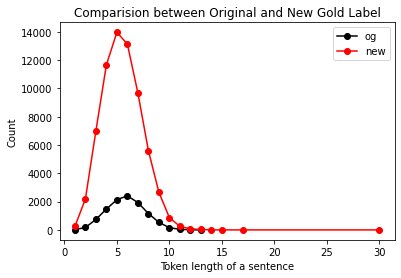

In [ ]:
token_length = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ,11, 12, 13]
token_number = [22, 175, 741, 1477, 2138, 2408, 1934, 1159, 539, 160, 43, 9, 1]
token_length_new = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11 ,12, 13, 14, 15, 17, 30]
token_number_new = [251, 2188, 7003, 11670, 13972, 13128, 9677, 5613, 2663, 871, 253, 79, 31, 5, 2, 1, 1]

ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2000))
plt.plot(token_length, token_number, color='black', marker='o', linestyle='solid', label="og")
plt.plot(token_length_new, token_number_new, color='red', marker='o', linestyle='solid', label="new")
plt.legend()
plt.title('Comparision between Original and New Gold Label')
plt.ylabel('Count')
plt.xlabel('Token length of a sentence')
plt.savefig('Comparision gold.eps', dpi=1000)

In [ ]:
print(f"""--- BASIC INFORMATIONS ---
페르소나 평균 길이  : {df.length.sum() / df.shape[0]}
페르소나 최장 길이  : {df.length.max()}
페르소나 최단 길이  : {df.length.min()}
{'-'*26}""")

--- BASIC INFORMATIONS ---
페르소나 평균 길이  : 6.714450533602538
페르소나 최장 길이  : 38
페르소나 최단 길이  : 3
--------------------------


In [ ]:
# 페르소나의 단어별 빈도 확인
wordCount = {}

for sentence in result_list:
    for word in sentence.split():
        wordCount[word] = wordCount.get(word, 0) + 1

wordCount = sorted(wordCount.items(), reverse=True, key=lambda item:item[1])

In [ ]:
df = pd.DataFrame(wordCount)
df[:20], len(wordCount)

(           0     1
 0          i  9616
 1         my  3940
 2          a  2944
 3         to  2922
 4         is  1958
 5        the  1634
 6       like  1587
 7   favorite  1428
 8         in  1371
 9       love  1323
 10       and   875
 11        am   770
 12        of   718
 13      work   674
 14      have   672
 15        at   556
 16     enjoy   502
 17        on   483
 18       for   470
 19      with   466, 3212)

In [ ]:
#-----------불용어 제거---------------#

In [ ]:
with open(skeleton_data_path, "r", encoding="utf-8") as skeleton_json_file:
    data = json.load(skeleton_json_file)

In [ ]:
# # 페르소나 문장 시작과 끝부분의 구두점만 제거 + 불용어 제거
import string
print(string.punctuation)

stopwords = nltk.corpus.stopwords.words("english")
result = ''
result_list = []
i=0
for idx, sentence in enumerate(data):
    for word in sentence['persona'].split():
        word = word.strip(string.punctuation)
        if word not in stopwords:
            result += word + ' '
    
    result = result.strip()
    result_list.append(result)
    result = ''

result_list[:10]

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


['played since 4 years old',
 'winter favorite season',
 'love job',
 'like spending time friends family',
 'draw friends little pony characters',
 'enjoy magic gathering  card game',
 'favorite tv show silicon valley',
 'work diner',
 'almost finished degree',
 'mother  ove']

In [ ]:
for idx, sentence in enumerate(result_list):
    for word in sentence.split():
        if word == 'need':
            print(sentence)

think need vacation
think need vacation
need use inhaler sometimes
think need vacation
sometimes need scream feel alive
need extra iron diet
need take 4 pills day live
need take 4 pills day live
need soda times
need take 4 pills day live
hate workout  need
think might need help
think might need help
think might need help
need corvette complete life
think need vacation
order internet  need
need corvette complete life
think need vacation
hate workout  need
think need vacation
need take blood sugar everyday
think need vacation
need soda times
need soda times
need take blood sugar everyday
need take blood sugar everyday
sometimes need scream feel alive
need extra iron diet
need soda times
need take 4 pills day live
think might need help
need take blood sugar everyday
think need botox soon


In [ ]:
personadict = {}
for idx, sentence in enumerate(result_list):
    personadict[sentence] = len(sentence.split())
df = pd.DataFrame({'Persona' : personadict.keys(), 'length': personadict.values()})
df = df.sort_values(by='length').reset_index(drop=True)

In [ ]:
df

,Persona,length
0,artist,1
1,baker,1
2,canadian,1
3,boat,1
4,mexico,1
...,...,...
3339,work legal assistant law firm basically handles real estate work,10
3340,night party hard atlanta club scene never miss music festival,10
3341,went welfare last month makes want run traffic front big trucks,11
3342,like give sassy sounding names actually help people think nice things,11


In [ ]:
df.loc[3343]['Persona']

'many friends us yet  going summer camp hope make friends  also think may make friends soccer fall'

In [ ]:
grouped = df.groupby('length')
grouped.first()

,Persona
length,
1,artist
2,looking job
3,youngest 8 kids
4,favorite musician charlie daniels
5,favorite tv show silicon valley
6,recite movie young frankenstein word word
7,like place blame people even know fault
8,write short stories document tab use prompting app
9,someday become famous animator work big company like dreamworks


In [ ]:
grouped.count()

,Persona
length,
1,115
2,707
3,1112
4,765
5,372
6,165
7,69
8,26
9,8


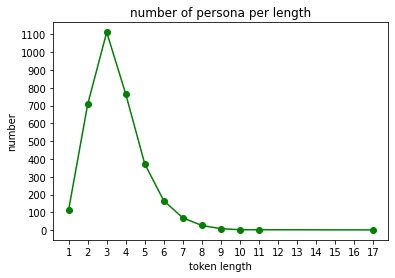

In [ ]:
token_length = [1, 2, 3, 4, 5, 6, 7, 8, 9 , 10, 11, 17]
token_number = [115, 707, 1112, 765, 372, 165, 69, 26, 8, 2, 2, 1]

ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(100))
plt.plot(token_length, token_number, color='green', marker='o', linestyle='solid')
plt.title('number of persona per length')
plt.ylabel('number')
plt.xlabel('token length')
plt.savefig('stop_persona.png', dpi=300)

In [ ]:
print(f"""--- BASIC INFORMATIONS ---
페르소나 평균 길이  : {df.length.sum() / df.shape[0]}
페르소나 최장 길이  : {df.length.max()}
페르소나 최단 길이  : {df.length.min()}
{'-'*26}""")

--- BASIC INFORMATIONS ---
페르소나 평균 길이  : 3.4680023923444976
페르소나 최장 길이  : 17
페르소나 최단 길이  : 1
--------------------------


In [ ]:
# 페르소나의 단어별 빈도 확인
wordCount = {}

for sentence in result_list:
    for word in sentence.split():
        wordCount[word] = wordCount.get(word, 0) + 1

In [ ]:
wordCount = sorted(wordCount.items(), reverse=True, key=lambda item:item[1])

In [ ]:
len(wordCount)

3092

In [ ]:
df = pd.DataFrame(wordCount)

In [ ]:
df.columns = ["Word", "Count"]

In [ ]:
df[:30]

,Word,Count
0,like,1587
1,favorite,1428
2,love,1323
3,work,674
4,enjoy,502
5,live,419
6,go,409
7,food,366
8,music,329
9,color,275


In [ ]:
 #******** 골드 문장 분석 ********#


In [ ]:
with open(skeleton_data_path, "r", encoding="utf-8") as skeleton_json_file:
    data = json.load(skeleton_json_file)

In [ ]:
len(data)

11722

In [ ]:
data[11720]['gold']

'i like going to my favorite sushi restaurant with friends .'

In [ ]:
for idx, sentence in enumerate(data):
    print(sentence['gold'])
    if idx == 10:
        break

never . i have been playing since i was four . it pays more than lifting weights .
i love skiing too ! i love winter and snow .
i am a bit of a workaholic , my job is my true love and also animals !
me too ! i get to hang out with my friends and family then .
enjoy them a lot . but not as much as my little pony !
i also love the game magic the gathering card game .
whats your favorite tv show ? mine silicon valley .
lucky ! i work at a diner and i own a cupcake business .
very cool ! i just turned 49 and am finally almost finished with my masters degree .
my mother wanted me to be an accountant . she hates me .
diabetics can die if that stuff goes wrong .


In [ ]:
# 문장 시작 끝부분의 구두점 제거
import string
print(string.punctuation)

result = ''
result_list = []
i=0
for idx, sentence in enumerate(data):
    for word in sentence['gold'].split():
        word = word.strip(string.punctuation)
        result += word + ' '
    
    result = result.strip()
    result_list.append(result)
    result = ''

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
result_list[:10]

['never  i have been playing since i was four  it pays more than lifting weights',
 'i love skiing too  i love winter and snow',
 'i am a bit of a workaholic  my job is my true love and also animals',
 'me too  i get to hang out with my friends and family then',
 'enjoy them a lot  but not as much as my little pony',
 'i also love the game magic the gathering card game',
 'whats your favorite tv show  mine silicon valley',
 'lucky  i work at a diner and i own a cupcake business',
 'very cool  i just turned 49 and am finally almost finished with my masters degree',
 'my mother wanted me to be an accountant  she hates me']

In [ ]:
len(result_list)

11722

In [ ]:
golddict = {}
for idx, sentence in enumerate(result_list):
    golddict[sentence] = len(sentence.split())

In [ ]:
df = pd.DataFrame({'gold' : golddict.keys(), 'length': golddict.values()})
df = df.sort_values(by='length').reset_index(drop=True)

In [ ]:
df

,gold,length
0,pizza,1
1,in kansas,2
2,ballet dancing,2
3,i hear voices,3
4,i love pizza,3
...,...,...
10807,you said you are not very cool maybe if you d...,19
10808,me too they are this funky band from the 80s ...,19
10809,so far 3 dogs and they have 2 pet cats i a...,19
10810,well i am 77 years old and i think that is a...,19


In [ ]:
df.loc[0]['gold']

'pizza'

In [ ]:
# 골드 전체 갯수는 10812개 / 골드가 활용되는 다이얼로그 갯수는 11722개

In [ ]:
grouped = df.groupby('length')
grouped.first()

,gold
length,
1,pizza
2,in kansas
3,i hear voices
4,she liked spaghetti also
5,yes oregon is my homeland
6,nope but i do eat fish
7,hello do you go on wine tours
8,great i cook and love mexican food you
9,i love horror movies i love to be afraid


In [ ]:
grouped.count(), grouped.count().sum()

(        gold
 length      
 1          1
 2          2
 3          3
 4         17
 5        192
 6        360
 7        493
 8        706
 9        902
 10      1030
 11      1195
 12      1249
 13      1306
 14      1203
 15      1055
 16       689
 17       369
 18        34
 19         6, gold    10812
 dtype: int64)

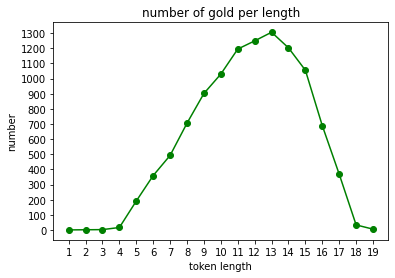

In [ ]:


token_length = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ,11, 12, 13, 14, 15, 16, 17, 18, 19]
token_number = [1, 2, 3, 17, 192, 360, 493, 706, 902, 1030, 1195, 1249, 1306, 1203, 1055, 689, 369, 34, 6]

ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(100))
plt.plot(token_length, token_number, color='green', marker='o', linestyle='solid')
plt.title('number of gold per length')
plt.ylabel('number')
plt.xlabel('token length')
plt.savefig('gold.png', dpi=300)

In [ ]:
#--------- 골드 불용어 처리 -----------#
with open(skeleton_data_path, "r", encoding="utf-8") as skeleton_json_file:
    data = json.load(skeleton_json_file)

In [ ]:
import string

stopwords = nltk.corpus.stopwords.words("english")
result = ''
result_list = []
i=0
for idx, sentence in enumerate(data):
    for word in sentence['gold'].split():
        word = word.strip(string.punctuation)
        if word not in stopwords:
            result += word + ' '
    
    result = result.strip()
    result_list.append(result)
    result = ''

result_list[:10]

['never  playing since four  pays lifting weights',
 'love skiing  love winter snow',
 'bit workaholic  job true love also animals',
 'get hang friends family',
 'enjoy lot  much little pony',
 'also love game magic gathering card game',
 'whats favorite tv show  mine silicon valley',
 'lucky  work diner cupcake business',
 'cool  turned 49 finally almost finished masters degree',
 'mother wanted accountant  hates']

In [ ]:
golddict = {}
for idx, sentence in enumerate(result_list):
    golddict[sentence] = len(sentence.split())

df = pd.DataFrame({'gold' : golddict.keys(), 'length': golddict.values()})
df = df.sort_values(by='length').reset_index(drop=True)

In [ ]:
df

,gold,length
0,,0
1,pets,1
2,car,1
3,kids,1
4,nachos,1
...,...,...
10802,sound like easy way make money new tech makes...,12
10803,read occasionally mostly play video games pare...,12
10804,alabama brings memories though child recall ...,12
10805,listen much music love reading fiction books ...,12


In [ ]:
grouped = df.groupby('length')
grouped.first()

,gold
length,
0,
1,pets
2,hi mechanic
3,traveled usa country
4,like germs even cat
5,mall today bought sweater small
6,spend lot time jogging working waitress
7,yeah well second best best power crystals
8,holidays always busy people get crazy comes s...


In [ ]:
grouped.count()

,gold
length,
0,1
1,22
2,175
3,741
4,1477
5,2138
6,2408
7,1934
8,1159


In [ ]:
grouped.count().sum()

gold    10807
dtype: int64

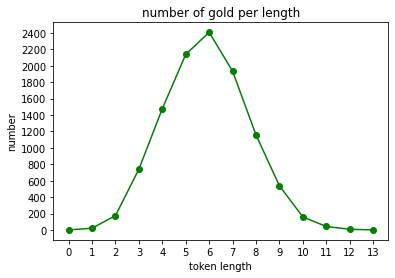

In [ ]:
token_length = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ,11, 12, 13]
token_number = [1, 22, 175, 741, 1477, 2138, 2408, 1934, 1159, 539, 160, 43, 9, 1]

ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(200))
plt.plot(token_length, token_number, color='green', marker='o', linestyle='solid')
plt.title('number of gold per length')
plt.ylabel('number')
plt.xlabel('token length')
plt.savefig('stop_gold.png', dpi=300)

In [ ]:
data[4]

{'ex_raw': [['<premise>',
   'not',
   'much',
   '.',
   'i',
   'usually',
   'watch',
   'the',
   'celtics',
   'play',
   'for',
   'fun',
   '.',
   '<raw>',
   'i',
   'draw',
   'all',
   'of',
   'my',
   'friends',
   'as',
   'my',
   'little',
   'pony',
   'characters',
   '.'],
  ['<raw>',
   'enjoy',
   'them',
   'a',
   'lot',
   '.',
   'but',
   'not',
   'as',
   'much',
   'as',
   'my',
   'little',
   'pony',
   '!']],
 'gold': 'enjoy them a lot . but not as much as my little pony !',
 'history': 'not much . i usually watch the celtics play for fun .',
 'label_raw': [[-100,
   -100,
   -100,
   -100,
   -100,
   -100,
   -100,
   -100,
   -100,
   -100,
   -100,
   -100,
   -100,
   -100,
   -100,
   -100,
   -100,
   -100,
   -100,
   -100,
   -100,
   -100,
   -100,
   -100,
   -100,
   -100],
  [-100, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1]],
 'persona': 'i draw all of my friends as my little pony characters .',
 'raw_skeleton_gold': ['enjoy them a lot . but

### 전처리 하나도 안한 분석 버젼 ###

In [ ]:
with open(skeleton_data_path, "r", encoding="utf-8") as skeleton_json_file:
    data = json.load(skeleton_json_file)
# 전처리 전혀 없는 지금 NC 과제 버젼
statics = {}
test = {}

for idx, sentence in enumerate(data):
    a = sentence['raw_skeleton_gold'][0].strip().split()
    gold_len = len(a)
    background_len = len(sentence['raw_skeleton_gold_unique'])
    attribute_len = gold_len - background_len
    statics[sentence['raw_skeleton_gold'][0].strip()] = [gold_len, background_len, attribute_len]
    test[sentence['gold']] = len(sentence['gold'].strip().split())

In [ ]:
df = pd.DataFrame({'gold': test.keys(), 'leng': test.values()})
df[:10]

,gold,leng
0,never . i have been playing since i was four ....,18
1,i love skiing too ! i love winter and snow .,11
2,"i am a bit of a workaholic , my job is my true...",18
3,me too ! i get to hang out with my friends and...,15
4,enjoy them a lot . but not as much as my littl...,14
5,i also love the game magic the gathering card ...,11
6,whats your favorite tv show ? mine silicon val...,10
7,lucky ! i work at a diner and i own a cupcake ...,14
8,very cool ! i just turned 49 and am finally al...,17
9,my mother wanted me to be an accountant . she ...,13


In [ ]:
len(df)

10812

In [ ]:
erase = set(df['gold'])

In [ ]:
len(erase)

10812

In [ ]:
df = pd.DataFrame({'skeleton_gold' : statics.keys(), 'statics': statics.values()})

In [ ]:
df[:20]

,Persona,length
0,i love laughing .,4
1,i hate running .,4
2,i enjoy shopping .,4
3,i love reading .,4
4,i travel often .,4
5,its great fun .,4
6,i enjoy cooking .,4
7,i teach kindergarten .,4
8,i love food .,4
9,i love money .,4


In [ ]:
df['statics'][0][0]

18

In [ ]:
i = 0
total_sum = 0
blank_sum = 0
back_sum = 0
for i in range(11646):
    total_sum += df['statics'][i][0]
    blank_sum += df['statics'][i][2]
    back_sum += df['statics'][i][1]

print(f"평균 스켈레톤 길이 {total_sum/11646}")
print(f"평균 백그라운드 길이 {back_sum/11646}")
print(f"평균 블랭크 길이 {blank_sum/11646}")

평균 스켈레톤 길이 13.981195260175168
평균 백그라운드 길이 10.015971148892323
평균 블랭크 길이 3.965224111282844


In [ ]:
sum = 0
persona_list = {}

for idx, sentence in enumerate(data):
    a = sentence['persona'].strip()
    persona_list[a] = len(a.split())
    sum += persona_list[a]

    # background_len = len(sentence['raw_skeleton_gold_unique'])
    # attribute_len = gold_len - background_len
    # statics[sentence['raw_skeleton_gold'][0].strip()] = [gold_len, background_len, attribute_len]
    # test[sentence['gold']] = len(sentence['gold'].strip().split())

In [ ]:
print(sum)

88328


In [ ]:
print(f"페르소나 평균 길이:{sum/11722}")

페르소나 평균 길이:7.535232895410339


In [ ]:
len(persona_list)

3467

In [ ]:
df = pd.DataFrame({'Persona':persona_list.keys(), 'length':persona_list.values()})
df = df.sort_values(by='length').reset_index(drop=True)

In [ ]:
df

,Persona,length
0,i love laughing .,4
1,i hate running .,4
2,i enjoy shopping .,4
3,i love reading .,4
4,i travel often .,4
...,...,...
3462,"at night , i party hard in the atlanta club sc...",20
3463,"i am a night owl , but i am an introvert so i ...",21
3464,"i went on welfare last month , which makes me ...",21
3465,"i m a night owl , but i m an introvert so i do...",21


In [ ]:
grouped = df.groupby('length')
grouped.first()

,Persona
length,
4,i love laughing .
5,my mother is dead .
6,i play dungeons and dragons .
7,i tend bar on the weekends .
8,i broke my nose in 5th grade .
9,i help them win a lot of money .
10,i starred in television commercials when i was...
11,my parents taught me to find inspiration in th...
12,my father use to drive a taxi cab in the 1970s .


In [ ]:
grouped.count()

,Persona
length,
4,168
5,460
6,686
7,634
8,468
9,309
10,228
11,169
12,104


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


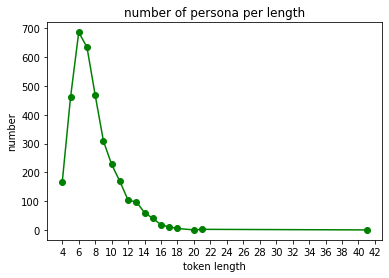

In [ ]:
token_length = [4, 5, 6, 7, 8, 9, 10, 11, 12 ,13, 14, 15, 16, 17, 18, 20, 21, 41]
token_number = [168, 460, 686, 634, 468, 309, 228, 169, 104, 98, 61, 41, 19, 11, 6, 1, 3, 1]

plt.plot(token_length, token_number, color='green', marker='o', linestyle='solid')
plt.title('number of persona per length')
plt.ylabel('number')
plt.xlabel('token length')
ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(100))
plt.savefig('persona_origin.png', dpi=300)

In [ ]:
# 전처리 전

result = ''
result_list = []
i=0
for idx, sentence in enumerate(data):
    for word in sentence['persona'].split():
        result += word + ' '
    
    result = result.strip()
    result_list.append(result)
    result = ''

In [ ]:
result_list[:10]

['i have played since i was 4 years old .',
 'winter is my favorite season .',
 'i love my job .',
 'i like spending time with my friends and family .',
 'i draw all of my friends as my little pony characters .',
 'i enjoy magic the gathering , it is a card game .',
 'my favorite tv show is silicon valley .',
 'i work in a diner .',
 'i m almost finished with my degree .',
 'my mother doesn t ! ove me .']

In [ ]:
# 페르소나의 단어별 빈도 확인
wordCount = {}

for sentence in result_list:
    for word in sentence.split():
        wordCount[word] = wordCount.get(word, 0) + 1

wordCount = sorted(wordCount.items(), reverse=True, key=lambda item:item[1])

In [ ]:
df = pd.DataFrame(wordCount)
df.columns = ["Word", "Count"]

In [ ]:
df[:30]

,Word,Count
0,.,11722
1,i,9616
2,my,3940
3,a,2944
4,to,2922
5,is,1958
6,the,1634
7,like,1587
8,favorite,1428
9,in,1371


In [ ]:
len(wordCount)

3215

#골드분석#

###전처리 없는 순수 골드###

In [ ]:
with open(skeleton_data_path, "r", encoding="utf-8") as skeleton_json_file:
    data = json.load(skeleton_json_file)

In [ ]:
# 문장 시작 끝부분의 구두점 제거

result = ''
result_list = []


import string
stopwords = nltk.corpus.stopwords.words("english")
pre_result = ''
pre_result_list = []

i=0
for idx, sentence in enumerate(data):
    for word in sentence['gold'].split():
        result += word + ' '
        pre_word = word.strip(string.punctuation)
        if pre_word not in stopwords:
            pre_result += pre_word + ' '

    result = result.strip()
    result_list.append(result)
    result = ''

    pre_result = pre_result.strip()
    pre_result_list.append(pre_result)
    pre_result = ''

print(result_list[:10])
print(pre_result_list[:10])

['never . i have been playing since i was four . it pays more than lifting weights .', 'i love skiing too ! i love winter and snow .', 'i am a bit of a workaholic , my job is my true love and also animals !', 'me too ! i get to hang out with my friends and family then .', 'enjoy them a lot . but not as much as my little pony !', 'i also love the game magic the gathering card game .', 'whats your favorite tv show ? mine silicon valley .', 'lucky ! i work at a diner and i own a cupcake business .', 'very cool ! i just turned 49 and am finally almost finished with my masters degree .', 'my mother wanted me to be an accountant . she hates me .']
['never  playing since four  pays lifting weights', 'love skiing  love winter snow', 'bit workaholic  job true love also animals', 'get hang friends family', 'enjoy lot  much little pony', 'also love game magic gathering card game', 'whats favorite tv show  mine silicon valley', 'lucky  work diner cupcake business', 'cool  turned 49 finally almost 

In [ ]:
result_list[-1]

'i often eat meat to make up for what i had to eat in the army !'

In [ ]:
golddict = {}
for idx, sentence in enumerate(result_list):
    golddict[sentence] = len(sentence.split())
df = pd.DataFrame({'gold' : golddict.keys(), 'length': golddict.values()})
df = df.sort_values(by='length').reset_index(drop=True)

In [ ]:
df

,gold,length
0,pizza !,2
1,ballet dancing .,3
2,in kansas .,3
3,i love pizza !,4
4,i hear voices .,4
...,...,...
10807,"sometimes , when i watch magic mike , i sing ,...",24
10808,"fascia . living in a small town , i try to wea...",24
10809,"so far , 3 dogs . . and they have 2 pet cats ,...",26
10810,you should ! ! ! its cool . . . . my cat is st...,27


In [ ]:
df.loc[10811]

gold      just on slackware playing quake ! ! ! ! ! ! ! ...
length                                                   58
Name: 10811, dtype: object

In [ ]:
grouped = df.groupby('length')
grouped.first()

,gold
length,
2,pizza !
3,ballet dancing .
4,i love pizza !
5,i am an attorney .
6,i draw for a living .
7,"its dave , nice to meet !"
8,"i would love to , what time ?"
9,yes and exercise to the alternative rock too .
10,"i am hiring , i hate my boss though ."


In [ ]:
grouped.count(), grouped.count().sum()

(        gold
 length      
 2          1
 3          2
 4          3
 5          9
 6        132
 7        252
 8        336
 9        486
 10       672
 11       812
 12       977
 13      1025
 14      1137
 15      1167
 16      1131
 17      1006
 18       792
 19       516
 20       242
 21        83
 22        18
 23         7
 24         3
 26         1
 27         1
 58         1, gold    10812
 dtype: int64)

findfont: Font family ['NanumGothic.TTF'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic.TTF'] not found. Falling back to DejaVu Sans.


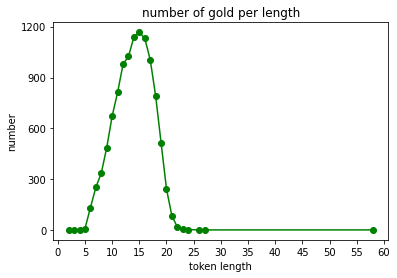

In [ ]:
token_length = [2, 3, 4, 5, 6, 7, 8, 9, 10 ,11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 58]
token_number = [1, 2, 3, 9, 132, 252, 336, 486, 672, 812, 977, 1025, 1137, 1167, 1131, 1006, 792, 516, 242, 83, 18, 7, 3, 1, 1, 1]

ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(300))
plt.plot(token_length, token_number, color='green', marker='o', linestyle='solid')
plt.title('number of gold per length')
plt.ylabel('number')
plt.xlabel('token length')
plt.savefig('nature_gold.png', dpi=300)

In [ ]:
print(f"""--- BASIC INFORMATIONS ---
골드 평균 길이  : {df.length.sum() / df.shape[0]}
골드 최장 길이  : {df.length.max()}
골드 최단 길이  : {df.length.min()}
{'-'*26}""")

--- BASIC INFORMATIONS ---
골드 평균 길이  : 13.909359970403255
골드 최장 길이  : 58
골드 최단 길이  : 2
--------------------------


In [ ]:
#골드 토큰 빈도 확인

wordCount = {}

for sentence in result_list:
    for word in sentence.split():
        wordCount[word] = wordCount.get(word, 0) + 1
wordCount = sorted(wordCount.items(), reverse=True, key=lambda item:item[1])

In [ ]:
len(wordCount)

6144

In [ ]:
df = pd.DataFrame(wordCount)
df.columns = ["Gold", "Count"]

In [ ]:
df[:30]

,Gold,Count
0,like,1847
1,love,1733
2,favorite,765
3,work,718
4,good,569
5,go,552
6,time,511
7,music,436
8,nice,402
9,oh,400


###전처리 한 골드

In [ ]:
golddict = {}
for idx, sentence in enumerate(pre_result_list):
    golddict[sentence] = len(sentence.split())
df = pd.DataFrame({'gold' : golddict.keys(), 'length': golddict.values()})
df = df.sort_values(by='length').reset_index(drop=True)

In [ ]:
df

,gold,length
0,,0
1,pets,1
2,car,1
3,kids,1
4,nachos,1
...,...,...
10802,sound like easy way make money new tech makes...,12
10803,read occasionally mostly play video games pare...,12
10804,alabama brings memories though child recall ...,12
10805,listen much music love reading fiction books ...,12


In [ ]:
grouped = df.groupby('length')
grouped.first()

,gold
length,
0,
1,pets
2,hi mechanic
3,traveled usa country
4,like germs even cat
5,mall today bought sweater small
6,spend lot time jogging working waitress
7,yeah well second best best power crystals
8,holidays always busy people get crazy comes s...


In [ ]:
grouped.count(), grouped.count().sum()

(        gold
 length      
 0          1
 1         22
 2        175
 3        741
 4       1477
 5       2138
 6       2408
 7       1934
 8       1159
 9        539
 10       160
 11        43
 12         9
 13         1, gold    10807
 dtype: int64)

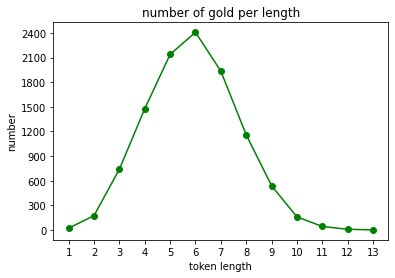

In [ ]:
token_length = [1, 2, 3, 4, 5, 6, 7, 8, 9 ,10, 11, 12, 13]
token_number = [22, 175, 741, 1477, 2138, 2408, 1934, 1159, 539, 160, 43, 9, 1]

ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(300))
plt.plot(token_length, token_number, color='green', marker='o', linestyle='solid')
plt.title('number of gold per length')
plt.ylabel('number')
plt.xlabel('token length')
plt.savefig('pre_gold.png', dpi=300)

In [ ]:
print(f"""--- BASIC INFORMATIONS ---
골드 평균 길이  : {df.length.sum() / df.shape[0]}
골드 최장 길이  : {df.length.max()}
골드 최단 길이  : {df.length.min()}
{'-'*26}""")

--- BASIC INFORMATIONS ---
골드 평균 길이  : 5.8754510965115205
골드 최장 길이  : 13
골드 최단 길이  : 0
--------------------------


In [ ]:
#골드 토큰 빈도 확인

wordCount = {}

for sentence in pre_result_list:
    for word in sentence.split():
        wordCount[word] = wordCount.get(word, 0) + 1
wordCount = sorted(wordCount.items(), reverse=True, key=lambda item:item[1])

In [ ]:
len(wordCount)

6007

In [ ]:
df = pd.DataFrame(wordCount)
df.columns = ["Gold", "Count"]

In [ ]:
df[:30]

,Gold,Count
0,like,1847
1,love,1733
2,favorite,765
3,work,718
4,good,569
5,go,552
6,time,511
7,music,436
8,nice,402
9,oh,400


# 스켈레톤 분석

## 구두점, 불용어 전처리를 적용한 페르소나와 골드로 만든 스켈레톤 분석

In [ ]:
skeleton_data_path = '/content/drive/MyDrive/논문작성_실험/before_triple.json'

In [ ]:
with open(skeleton_data_path, "r", encoding="utf-8") as skeleton_json_file:
    data = json.load(skeleton_json_file)

In [ ]:
data[:3]

[{'gold': 'never  playing since four  pays lifting weights',
  'persona': 'played since 4 years old',
  'skeleton': ['never playing  __ four pays lifting weights '],
  'skeleton_gold_unique': [[1, 'never'],
   [2, 'playing'],
   [4, 'four'],
   [5, 'pays'],
   [6, 'lifting'],
   [7, 'weights']]},
 {'gold': 'love skiing  love winter snow',
  'persona': 'winter favorite season',
  'skeleton': ['love skiing love  __ snow '],
  'skeleton_gold_unique': [[1, 'love'],
   [2, 'skiing'],
   [3, 'love'],
   [5, 'snow']]},
 {'gold': 'bit workaholic  job true love also animals',
  'persona': 'love job',
  'skeleton': ['bit workaholic job true  __ also animals '],
  'skeleton_gold_unique': [[1, 'bit'],
   [2, 'workaholic'],
   [3, 'job'],
   [4, 'true'],
   [6, 'also'],
   [7, 'animals']]}]

In [ ]:
statics = {}
test = {}

for idx, sentence in enumerate(data):
    a = sentence['skeleton'][0].strip().split()
    gold_len = len(a)
    background_len = len(sentence['skeleton_gold_unique'])
    attribute_len = gold_len - background_len
    statics[sentence['skeleton'][0].strip()] = [gold_len, background_len, attribute_len]
    test[sentence['gold']] = len(sentence['gold'].strip().split())

In [ ]:
df = pd.DataFrame({'gold': test.keys(), 'leng': test.values()})
df[:10]

,gold,leng
0,never playing since four pays lifting weights,7
1,love skiing love winter snow,5
2,bit workaholic job true love also animals,7
3,get hang friends family,4
4,enjoy lot much little pony,5
5,also love game magic gathering card game,7
6,whats favorite tv show mine silicon valley,7
7,lucky work diner cupcake business,5
8,cool turned 49 finally almost finished master...,8
9,mother wanted accountant hates,4


In [ ]:
len(df)

10807

In [ ]:
erase = set(df['gold'])
len(erase)

10807

In [ ]:
df = pd.DataFrame({'skeleton_gold' : statics.keys(), 'statics': statics.values()})

In [ ]:
df

,skeleton_gold,statics
0,never playing __ four pays lifting weights,"[7, 6, 1]"
1,love skiing love __ snow,"[5, 4, 1]"
2,bit workaholic job true __ also animals,"[7, 6, 1]"
3,get hang __ __,"[4, 2, 2]"
4,enjoy lot much __ __,"[5, 3, 2]"
...,...,...
11383,children play enough golf however donkey kongs,"[7, 7, 0]"
11384,love music __ __ best,"[5, 3, 2]"
11385,fun dad __ __ __ know,"[6, 3, 3]"
11386,like going favorite __ restaurant friends,"[6, 5, 1]"


In [ ]:
i = 0
blank_sum = 0
back_sum = 0
for i in range(11388):
    blank_sum += df['statics'][i][2]
    back_sum += df['statics'][i][1]

print(f"평균 백그라운드 길이 {back_sum/11388}")
print(f"평균 블랭크 길이 {blank_sum/11388}")

평균 백그라운드 길이 4.328503688092729
평균 블랭크 길이 1.6631541974007726


In [ ]:
exp_data_path = '/content/drive/MyDrive/논문작성_실험/edited_triple_train.json'

## 확장 페르소나들의 토큰 종류 빈도 / USED 확장 페르소나 토큰 종류 빈도- 리얼 월드와 가까워지는 것 표현

In [ ]:
with open(exp_data_path, 'r', encoding='utf-8') as exp_json_file:
    data = json.load(exp_json_file)

In [ ]:
list_item = list(data["train"][1]['exp_personality'][0].values())
list_item
#'xeffect'
#'xintent'
#'xneed'
#'xreact'
#'xwant'


[['<none>', '<none>', '<none>', '<none>', '<none>'],
 ['<none>', '<none>', '<none>', '<none>', '<none>'],
 ['<none>', '<none>', '<none>', '<none>', '<none>'],
 ['<none>', '<none>', '<none>', 'I need to buy oranges', '<none>'],
 ['<none>', '<none>', '<none>', '<none>', 'I want to buy oranges'],
 ['<none>', '<none>', '<none>', '<none>', '<none>']]

In [ ]:
list_item

[['<none>', '<none>', '<none>', '<none>', '<none>'],
 ['<none>', '<none>', '<none>', '<none>', '<none>'],
 ['<none>', '<none>', '<none>', '<none>', '<none>'],
 ['<none>', '<none>', '<none>', 'I need to buy oranges', '<none>'],
 ['<none>', '<none>', '<none>', '<none>', 'I want to buy oranges'],
 ['<none>', '<none>', '<none>', '<none>', '<none>']]

In [ ]:
with open(exp_data_path, 'r', encoding='utf-8') as exp_json_file:
    data = json.load(exp_json_file)

In [ ]:
mode = 'train'
total = []

for i, exp in enumerate(data[mode]):
    for j in range(len(data[mode][i]['exp_personality'])):
        for k in range(len(data[mode][i]['exp_personality'][j])):
            result = list(data["train"][i]['exp_personality'][j].values())
            total.extend(result)

In [ ]:
total[0]

['I am young', 'I am youthful', '<none>', '<none>', 'I am happy']

In [ ]:
results = []
for i, data in enumerate(total):
    # print(data)
    results.extend(data)
print(len(results))

27405900


In [ ]:
results[:5]

['I am young', 'I am youthful', '<none>', '<none>', 'I am happy']

In [ ]:
data[2]

'I feel entertained'

In [ ]:
print(len(data[1].split()))

1


In [ ]:
sum = 0

for idx, sentence in enumerate(results):
    sum += len(sentence.split())

avg_sum = sum / len(results)

In [ ]:
sum

67254678

In [ ]:
avg_sum

2.454021871202916

In [ ]:
#중복 제거 
results = []
for i, data in enumerate(total):
    # print(data)
    results.extend(data)

overlap_del_results = set(results)
print(len(overlap_del_results))

13489


In [ ]:
exp_list = {}
sum = 0

for idx, sentence in enumerate(overlap_del_results):
    exp_list[sentence] = len(sentence.split())
    sum += exp_list[sentence]

print(f"확장 페르소나 평균 길이:{sum/13489}")

확장 페르소나 평균 길이:5.7944992215879605


In [ ]:
df = pd.DataFrame({'exp_persona': exp_list.keys(), 'length': exp_list.values()})
df = df.sort_values(by='length').reset_index(drop=True)

In [ ]:
df

,exp_persona,length
0,<none>,1
1,I travels,2
2,I writes,2
3,I dances,2
4,I bleeds,2
...,...,...
13484,I feel like he has more money than he knows wh...,14
13485,I need to have a siberian huberian huberars hu...,14
13486,I feel like he has more money than he knows wh...,15
13487,I need to have a siberian huberian huberars hu...,15


In [ ]:
pd.options.display.max_colwidth = 2000

In [ ]:
df.loc[df['length'] == 16]

,exp_persona,length
13488,I need to have a siberian huberian huberars huberars huberars huberars huberars huberars huberars huberars huber,16


In [ ]:
df.loc[df.index == 13486]['exp_persona']
df.loc[df.index == 13487]['exp_persona']

13487    I need to have a siberian huberian huberars huberars huberars huberars huberars huberars huberars huberars
Name: exp_persona, dtype: object

In [ ]:
grouped = df.groupby('length')
grouped.first()

,exp_persona
length,
1,<none>
2,I travels
3,I builds things
4,I gets called old
5,I need to like outdoors
6,I want to apply to jobs
7,I need to get a comic book
8,I need to be close to my friend
9,I need to have a good night 's sleep


In [ ]:
grouped.loc[grouped.index == 15]

AttributeError: ignored

In [ ]:
grouped.count()

,exp_persona
length,
1,1
2,63
3,1631
4,1178
5,2726
6,3520
7,2375
8,1249
9,526


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


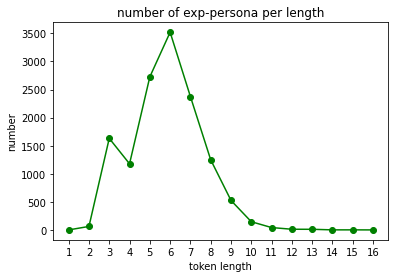

In [ ]:
token_length = [1, 2, 3, 4, 5, 6, 7, 8, 9 , 10, 11, 12, 13, 14, 15, 16]
token_number = [1, 63, 1631, 1178, 2726, 3520, 2375, 1249, 526, 147, 43, 13, 12, 2, 2, 1]

plt.plot(token_length, token_number, color='green', marker='o', linestyle='solid')
plt.title('number of exp-persona per length')
plt.ylabel('number')
plt.xlabel('token length')
ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(500))
plt.savefig('persona_exp.png', dpi=300)

In [ ]:
# 확장 페르소나의 단어별 빈도 확인
wordCount = {}

for sentence in overlap_del_results:
    for word in sentence.split():
        wordCount[word] = wordCount.get(word, 0) + 1

wordCount = sorted(wordCount.items(), reverse=True, key=lambda item:item[1])

In [ ]:
df = pd.DataFrame(wordCount)
df.columns = ["Word", "Count"]

In [ ]:
df[:30]

,Word,Count
0,I,13488
1,to,10992
2,need,6018
3,a,3647
4,want,3612
5,the,2001
6,be,1486
7,have,928
8,buy,879
9,go,775


In [ ]:
len(wordCount)

3174

## 전처리된 확장 페르소나들의 토큰 종류 빈도 / USED 확장 페르소나 토큰 종류 빈도- 리얼 월드와 가까워지는 것 표현


In [ ]:
exp_data_path = '/content/drive/MyDrive/논문작성_실험/edited_triple_train.json'
with open(exp_data_path, 'r', encoding='utf-8') as exp_json_file:
    data = json.load(exp_json_file)

mode = 'train'
total = []

for i, exp in enumerate(data[mode]):
    for j in range(len(data[mode][i]['exp_personality'])):
        for k in range(len(data[mode][i]['exp_personality'][j])):
            result = list(data["train"][i]['exp_personality'][j].values())
            total.extend(result)

#중복 제거 
results = []
for i, data in enumerate(total):
    # print(data)
    results.extend(data)

overlap_del_results = set(results)
print(len(overlap_del_results))

13489


In [ ]:
import string
print(string.punctuation)

stopwords = nltk.corpus.stopwords.words("english")
result = ''
result_list_exp = []
i=0
for idx, sentence in enumerate(overlap_del_results):
    for word in sentence.lower().split():
        word = word.strip(string.punctuation)
        if word not in stopwords:
            result += word + ' '
    
    result = result.strip()
    result_list_exp.append(result)
    result = ''

result_list_exp[:10]

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


['need 5 feet',
 'want give birth',
 'gets big check',
 'feel eager',
 'want sell farm',
 'jovandazy jovandazy',
 'want eat ice cream',
 'need go bus stop',
 'want show',
 'want teach music kids']

In [ ]:
exp_list = {}
sum = 0

for idx, sentence in enumerate(result_list_exp):
    exp_list[sentence] = len(sentence.split())
    sum += exp_list[sentence]

print(f"확장 페르소나 평균 길이:{sum/10768}")

확장 페르소나 평균 길이:3.5169019316493313


In [ ]:
exp_personadict = {}
for idx, sentence in enumerate(result_list_exp):
    exp_personadict[sentence] = len(sentence.split())
df = pd.DataFrame({'Persona' : exp_personadict.keys(), 'length': exp_personadict.values()})
df = df.sort_values(by='length').reset_index(drop=True)

In [ ]:
df

,Persona,length
0,perceptive,1
1,cries,1
2,cat,1
3,contemplative,1
4,pastor,1
...,...,...
10763,speaks fluently fluently fluently fluently flu...,7
10764,need siberian huberian huberars huberars huber...,9
10765,need siberian huberian huberars huberars huber...,10
10766,need siberian huberian huberars huberars huber...,11


In [ ]:
grouped = df.groupby('length')
grouped.first()

,Persona
length,
1,perceptive
2,need admired
3,thinks deeply space
4,feel like pet person
5,thinks deeply current political situation
6,want make sure n't get sick
7,want make sure cats n't get trouble
9,need siberian huberian huberars huberars huber...
10,need siberian huberian huberars huberars huber...


In [ ]:
grouped.count()

,Persona
length,
1,854
2,2774
3,4981
4,1881
5,232
6,38
7,4
9,1
10,1


In [ ]:
grouped['length'].sum()

length
1       854
2      5548
3     14943
4      7524
5      1160
6       228
7        28
9         9
10       10
11       11
12       12
Name: length, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


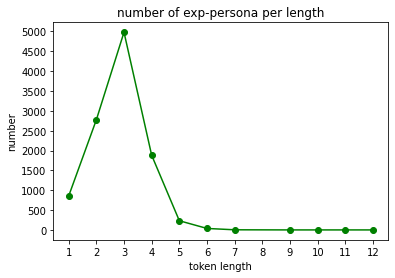

In [ ]:
token_length = [1, 2, 3, 4, 5, 6, 7, 9 , 10, 11, 12]
token_number = [854, 2774, 4981, 1881, 232, 38, 4, 1, 1, 1, 1]

plt.plot(token_length, token_number, color='green', marker='o', linestyle='solid')
plt.title('number of exp-persona per length')
plt.ylabel('number')
plt.xlabel('token length')
ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(500))
plt.savefig('stop_persona_exp.png', dpi=300)

In [ ]:
wordCount_exp = {}

for sentence in result_list_exp:
    for word in sentence.split():
        wordCount_exp[word] = wordCount_exp.get(word, 0) + 1

wordCount_exp = sorted(wordCount_exp.items(), reverse=True, key=lambda item:item[1])

exp_df = pd.DataFrame(wordCount_exp)
exp_df.columns = ["Word", "Count"]

In [ ]:
# 전처리 확장 페르소나의 단어별 빈도 확인
wordCount_exp = {}

for sentence in result_list_exp:
    for word in sentence.split():
        wordCount_exp[word] = wordCount_exp.get(word, 0) + 1

wordCount_exp = sorted(wordCount_exp.items(), reverse=True, key=lambda item:item[1])

exp_df = pd.DataFrame(wordCount_exp)
exp_df.columns = ["Word", "Count"]

In [ ]:
exp_df = exp_df.drop([exp_df.columns[1]], axis=1)
exp_df[:30]

,Word
0,need
1,want
2,buy
3,go
4,get
5,gets
6,feel
7,like
8,learn
9,eat


In [ ]:
len(wordCount_exp)

3078

In [ ]:
result_list[:10]

['never . i have been playing since i was four . it pays more than lifting weights .',
 'i love skiing too ! i love winter and snow .',
 'i am a bit of a workaholic , my job is my true love and also animals !',
 'me too ! i get to hang out with my friends and family then .',
 'enjoy them a lot . but not as much as my little pony !',
 'i also love the game magic the gathering card game .',
 'whats your favorite tv show ? mine silicon valley .',
 'lucky ! i work at a diner and i own a cupcake business .',
 'very cool ! i just turned 49 and am finally almost finished with my masters degree .',
 'my mother wanted me to be an accountant . she hates me .']

In [ ]:
result_list_exp[:10]

['need 5 feet',
 'want give birth',
 'gets big check',
 'feel eager',
 'want sell farm',
 'jovandazy jovandazy',
 'want eat ice cream',
 'need go bus stop',
 'want show',
 'want teach music kids']

In [ ]:
# 원본 페르소나
import string
print(string.punctuation)
with open(skeleton_data_path, "r", encoding="utf-8") as skeleton_json_file:
    data = json.load(skeleton_json_file)
stopwords = nltk.corpus.stopwords.words("english")
result = ''
result_list = []
i=0
for idx, sentence in enumerate(data):
    for word in sentence['persona'].split():
        word = word.strip(string.punctuation)
        if word not in stopwords:
            result += word + ' '
    
    result = result.strip()
    result_list.append(result)
    result = ''

wordCount = {}

for sentence in result_list:
    for word in sentence.split():
        wordCount[word] = wordCount.get(word, 0) + 1

wordCount = sorted(wordCount.items(), reverse=True, key=lambda item:item[1])

df = pd.DataFrame(wordCount)
df.columns = ["Word", "Count"]
df = df.drop([df.columns[1]], axis=1)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
df[:10]

,Word
0,like
1,favorite
2,love
3,work
4,enjoy
5,live
6,go
7,food
8,music
9,color


##확장 페르소나와 그냥 페르소나가 가진 공통 / 차이 토큰 찾기

In [ ]:
import pandas as pd

In [ ]:
common_df = exp_df.merge(df, how='inner', indicator=False)

In [ ]:
common_df

,Word
0,need
1,want
2,buy
3,go
4,get
...,...
1565,council
1566,dust
1567,piercings
1568,elementary


In [ ]:
onlyexp_df = exp_df.merge(df, how='outer', indicator=True).loc[lambda x:x['_merge']=='left_only'].reset_index(drop=True)

In [ ]:
onlyexp_df

,Word,_merge
0,buys,left_only
1,eats,left_only
2,becomes,left_only
3,learns,left_only
4,deeply,left_only
...,...,...
1503,locks,left_only
1504,boxing,left_only
1505,interviews,left_only
1506,relaxing,left_only


In [ ]:
onlyexp_df.iloc[300:340]

,Word,_merge
300,bath,left_only
301,rule,left_only
302,abandoned,left_only
303,freak,left_only
304,lucky,left_only
305,interested,left_only
306,funeral,left_only
307,fastest,left_only
308,contacts,left_only
309,disappointed,left_only


In [ ]:
only_df = exp_df.merge(df, how='outer', indicator=True).loc[lambda x:x['_merge']=='right_only'].reset_index(drop=True)

In [ ]:
only_df

,Word,_merge
0,hate,right_only
1,also,right_only
2,used,right_only
3,recently,right_only
4,got,right_only
...,...,...
1517,snowboarding,right_only
1518,wide,right_only
1519,spaces,right_only
1520,sunsets,right_only


In [ ]:
only_df[1000:1060]

,Word,_merge
1000,discovering,right_only
1001,multiple,right_only
1002,knowing,right_only
1003,marley,right_only
1004,landing,right_only
1005,faked,right_only
1006,mma,right_only
1007,dissapointment,right_only
1008,occasional,right_only
1009,farts,right_only


###페르소나와 확장페르소나가 같은 문장이 있는지 확인(전처리 후 기준)

In [ ]:
result_list[:2]

['played since 4 years old', 'winter favorite season']

In [ ]:
result_list_exp[:2]

['need 5 feet', 'want give birth']

In [ ]:
count = 0
for i, ori in enumerate(result_list):
    for j, exp in enumerate(result_list_exp):
        if (ori == exp) and (len(ori.split()) == 1) :
            count += 1
print(count)

320


In [ ]:
# 1: 320 2: 45  3: 3

## 뉴골드 분석

In [ ]:
newgold_data_path = '/content/drive/MyDrive/논문작성_실험/perturb3_final_v2.json'

In [ ]:
with open(newgold_data_path, "r", encoding="utf-8") as newgold_json_file:
    data = json.load(newgold_json_file)

In [ ]:
exp_gold_list = []

In [ ]:
new_gold_history = 0
new_gold_utterances = 0

In [ ]:
new_gold_count = 0

In [ ]:
for i, item in enumerate(data['train']):
    for j in range(len(item['utterances'])):
        if item['utterances'][j]['aug']:
            for k in range(len(item['utterances'][j]['aug'])):
                if item['utterances'][j]['aug'][k]['new_responses']:
                    exp_gold_list.append(item['utterances'][j]['aug'][k]['new_responses'])

KeyError: ignored

In [ ]:
exp_gold_list[:20]

In [ ]:
len(exp_gold_list)

82509

In [ ]:
valid_exp_gold_list = []

for i, item in enumerate(data['train']):
    for j in range(len(item['utterances'])):
        valid_exp_gold_list.append(item['utterances'][j]['skeleton'])

result_skeleton = set(valid_exp_gold_list)

In [ ]:
len(result_skeleton)

30465

In [ ]:
valid_exp_gold_list = []

for i, item in enumerate(data['valid']):
    for j in range(len(item['utterances'])):
        valid_exp_gold_list.append(item['utterances'][j]['skeleton'])

result_skeleton = set(valid_exp_gold_list)

In [ ]:
result_skeleton

{'<none>',
 'do you  __ ',
 'do you  __ any  __ ',
 'i listen to country  __ ',
 'what do you  __ for fun ',
 'what is your  __ ',
 'you have  __ '}

In [ ]:
for i, item in enumerate(data['valid']):
    print(item['utterances']['aug'])
    break

TypeError: ignored

In [ ]:
len(set(exp_gold_list))

68606

In [ ]:
dot_sentence_result = []

In [ ]:
for i, sentence in enumerate(exp_gold_list):
    dot_sentence = sentence + ' ' + '.'
    dot_sentence_result.append(dot_sentence)

In [ ]:
dot_sentence_result[:4]

['you must be very fast . deer hunting is one of my favorite hobbies .',
 'you must be very fast . hunting is one of my favorite hobbies .',
 'you must be very fast . hunting is one of my favorite hobbies .',
 'i also remodel homes when i am not out bow hunting .']

In [ ]:
import string

result = ''
result_list = []


import string
stopwords = nltk.corpus.stopwords.words("english")
pre_result = ''
pre_result_list = []

for idx, sentence in enumerate(dot_sentence_result):
    for word in sentence.split():
        result += word + ' '
        pre_word = word.strip(string.punctuation)
        if pre_word not in stopwords:
            pre_result += pre_word + ' '

    result = result.strip()
    result_list.append(result)
    result = ''

    pre_result = pre_result.strip()
    pre_result_list.append(pre_result)
    pre_result = ''

print(result_list[:10]) # 전처리 전 뉴 골드
print(pre_result_list[:10]) # 전처리 후 뉴 골드

['you must be very fast . deer hunting is one of my favorite hobbies .', 'you must be very fast . hunting is one of my favorite hobbies .', 'you must be very fast . hunting is one of my favorite hobbies .', 'i also remodel homes when i am not out bow hunting .', 'i also remodel homes when i am not out bow hunting .', 'i also remodel homes when i am not out bow hunting .', 'if i have time outside of deer shooting and remodeling homes . which is not much .', 'if i have time outside of hunting and remodeling homes . which is not much .', 'if i have time outside of hunting and remodeling homes . which is not much .', 'that is a good show i watch that while drinking iced tea .']
['must fast  deer hunting one favorite hobbies', 'must fast  hunting one favorite hobbies', 'must fast  hunting one favorite hobbies', 'also remodel homes bow hunting', 'also remodel homes bow hunting', 'also remodel homes bow hunting', 'time outside deer shooting remodeling homes  much', 'time outside hunting remod

In [ ]:
# 전처리 전 뉴골드 분석
newgolddict = {}
for idx, sentence in enumerate(result_list):
    newgolddict[sentence] = len(sentence.split())
df = pd.DataFrame({'gold' : newgolddict.keys(), 'length': newgolddict.values()})
df = df.sort_values(by='length').reset_index(drop=True)

In [ ]:
df

,gold,length
0,lol .,2
1,adrenaline .,2
2,hunger .,2
3,hunting .,2
4,musical .,2
...,...,...
68601,sounds like fun . i can not go anywhere becaus...,31
68602,sure sure sure sure sure sure sure sure sure s...,31
68603,hey there . what kind of car do you have . min...,31
68604,nice ! i get some exercise when walking my dog...,31


In [ ]:
print(f"""--- BASIC INFORMATIONS ---
골드 평균 길이  : {df.length.sum() / df.shape[0]}
골드 최장 길이  : {df.length.max()}
골드 최단 길이  : {df.length.min()}
{'-'*26}""")

--- BASIC INFORMATIONS ---
골드 평균 길이  : 13.349736174678599
골드 최장 길이  : 31
골드 최단 길이  : 2
--------------------------


In [ ]:
grouped = df.groupby('length')
grouped.first()

,gold
length,
2,lol .
3,helping others .
4,i love baking .
5,do you ever outdoors .
6,i make money at aldis .
7,i enjoy being a new look .
8,"no no , too many sick people ."
9,i got a very thin one right now .
10,"near abigail , she is wonderful ever ! ! ."


In [ ]:
grouped.count()

,gold
length,
2,6
3,19
4,141
5,548
6,1409
7,2234
8,3122
9,4074
10,5037


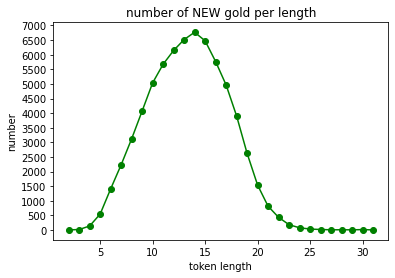

In [ ]:
token_length = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11 ,12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
token_number = [6, 19, 141, 548, 1409, 2234, 3122, 4074, 5037, 5674, 6146, 6518, 6769, 6476, 5767, 4966, 3906, 2627, 1541, 817, 437, 184, 79, 36, 20, 10, 11, 9, 17, 6]

ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(500))
plt.plot(token_length, token_number, color='green', marker='o', linestyle='solid')
plt.title('number of NEW gold per length')
plt.ylabel('number')
plt.xlabel('token length')
plt.savefig('new_gold.png', dpi=300)

In [ ]:
#전처리 전 골드 토큰 빈도 확인

wordCount = {}

for sentence in result_list:
    for word in sentence.split():
        wordCount[word] = wordCount.get(word, 0) + 1
wordCount = sorted(wordCount.items(), reverse=True, key=lambda item:item[1])
len(wordCount)

10079

In [ ]:
df = pd.DataFrame(wordCount)
df.columns = ["Gold", "Count"]
df[:30]

,Gold,Count
0,.,124281
1,i,91597
2,to,36172
3,",",28691
4,a,27968
5,my,21794
6,am,18700
7,is,17585
8,the,17240
9,and,13854


In [ ]:
# 전처리 후 뉴골드 분석
newgolddict = {}
for idx, sentence in enumerate(pre_result_list):
    newgolddict[sentence] = len(sentence.split())
df = pd.DataFrame({'gold' : newgolddict.keys(), 'length': newgolddict.values()})
df = df.sort_values(by='length').reset_index(drop=True)

In [ ]:
df

,gold,length
0,,0
1,hair,1
2,well,1
3,unemployed,1
4,computer,1
...,...,...
67404,yeah well school thing like listen adventurou...,14
67405,sounds like plan eating lots food fave food ...,15
67406,sounds delicious chocolate loving loves choco...,15
67407,like iced coffee jazz going lake michigan k...,17


In [ ]:
print(f"""--- BASIC INFORMATIONS ---
골드 평균 길이  : {df.length.sum() / df.shape[0]}
골드 최장 길이  : {df.length.max()}
골드 최단 길이  : {df.length.min()}
{'-'*26}""")

--- BASIC INFORMATIONS ---
골드 평균 길이  : 5.496966280467
골드 최장 길이  : 30
골드 최단 길이  : 0
--------------------------


In [ ]:
grouped = df.groupby('length')
grouped.first()

,gold
length,
0,
1,hair
2,doctor job
3,nope love hungry
4,enjoy eating burritos tacos
5,yes sure love hearing music
6,oh would love ragini pet lizard
7,really feel like hangout excited never surfing
8,great think get along animals better people time


In [ ]:
grouped.count(), grouped.count().sum()

(         gold
 length       
 0           1
 1         251
 2        2188
 3        7003
 4       11670
 5       13972
 6       13128
 7        9677
 8        5613
 9        2663
 10        871
 11        253
 12         79
 13         31
 14          5
 15          2
 17          1
 30          1, gold    67409
 dtype: int64)

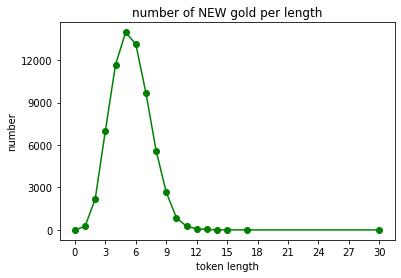

In [ ]:
token_length = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11 ,12, 13, 14, 15, 17, 30]
token_number = [1, 251, 2188, 7003, 11670, 13972, 13128, 9677, 5613, 2663, 871, 253, 79, 31, 5, 2, 1, 1]

ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.yaxis.set_major_locator(ticker.MultipleLocator(3000))
plt.plot(token_length, token_number, color='green', marker='o', linestyle='solid')
plt.title('number of NEW gold per length')
plt.ylabel('number')
plt.xlabel('token length')
plt.savefig('new_gold_trim.png', dpi=300)

9936

In [ ]:
#원본 골드 전처리 후 빈도 확인
skeleton_data_path = '/content/drive/MyDrive/논문작성_실험/train_skeletons_before.json'

with open(skeleton_data_path, "r", encoding="utf-8") as skeleton_json_file:
    data = json.load(skeleton_json_file)

result = ''
result_list = []


import string
stopwords = nltk.corpus.stopwords.words("english")
pre_result = ''
pre_result_list = []

i=0
for idx, sentence in enumerate(data):
    for word in sentence['gold'].split():
        result += word + ' '
        pre_word = word.strip(string.punctuation)
        if pre_word not in stopwords:
            pre_result += pre_word + ' '

    result = result.strip()
    result_list.append(result)
    result = ''

    pre_result = pre_result.strip()
    pre_result_list.append(pre_result)
    pre_result = ''
    
wordCount = {}

for sentence in pre_result_list:
    for word in sentence.split():
        wordCount[word] = wordCount.get(word, 0) + 1
wordCount = sorted(wordCount.items(), reverse=True, key=lambda item:item[1])

df = pd.DataFrame(wordCount)
df.columns = ["Gold", "Count"]
df = df.drop([df.columns[1]], axis=1)
df[:10]

,Gold
0,like
1,love
2,favorite
3,work
4,good
5,go
6,time
7,music
8,nice
9,oh


In [ ]:
len(df)

6007

In [ ]:
#전처리 후 뉴골드 토큰 빈도 확인
newgold_data_path = '/content/drive/MyDrive/논문작성_실험/perturb3_final_optimized.json'
with open(newgold_data_path, "r", encoding="utf-8") as newgold_json_file:
    data = json.load(newgold_json_file)

exp_gold_list = []

for i, item in enumerate(data['train']):
    for j in range(len(item['utterances'])):
        if item['utterances'][j]['aug']:
            for k in range(len(item['utterances'][j]['aug'])):
                if item['utterances'][j]['aug'][k]['new_responses']:
                    exp_gold_list.append(item['utterances'][j]['aug'][k]['new_responses'])

for i, sentence in enumerate(exp_gold_list):
    dot_sentence = sentence + ' ' + '.'
    dot_sentence_result.append(dot_sentence)



import string
stopwords = nltk.corpus.stopwords.words("english")

result = ''
new_result_list = []
pre_result = ''
pre_new_result_list = []

for idx, sentence in enumerate(dot_sentence_result):
    for word in sentence.split():
        result += word + ' '
        pre_word = word.strip(string.punctuation)
        if pre_word not in stopwords:
            pre_result += pre_word + ' '

    result = result.strip()
    new_result_list.append(result)
    result = ''

    pre_result = pre_result.strip()
    pre_new_result_list.append(pre_result)
    pre_result = ''

exp_wordCount = {}
for sentence in pre_new_result_list:
    for word in sentence.split():
        exp_wordCount[word] = exp_wordCount.get(word, 0) + 1
exp_wordCount = sorted(exp_wordCount.items(), reverse=True, key=lambda item:item[1])


In [ ]:
new_df = pd.DataFrame(exp_wordCount)
new_df.columns = ["Gold", "Count"]
new_df = new_df.drop([new_df.columns[1]], axis=1)
new_df[:10]

,Gold
0,like
1,love
2,need
3,want
4,good
5,go
6,get
7,work
8,time
9,feel


In [ ]:
import pandas as pd
common_df = new_df.merge(df, how='inner', indicator=False)
common_df

,Gold
0,like
1,love
2,need
3,want
4,good
...,...
5626,eastwood
5627,glitter
5628,brad
5629,shoulders


In [ ]:
len(common_df)

5631

In [ ]:
onlyexp_df = new_df.merge(df, how='outer', indicator=True).loc[lambda x:x['_merge']=='left_only'].reset_index(drop=True)

In [ ]:
onlyexp_df[:10]

,Gold,_merge
0,entertained,left_only
1,intelligent,left_only
2,hundred,left_only
3,drunk,left_only
4,satisfied,left_only
5,fat,left_only
6,promotion,left_only
7,honeymoon,left_only
8,thirty,left_only
9,thirsty,left_only


In [ ]:
len(onlyexp_df)

4305

In [ ]:
only_df = new_df.merge(df, how='outer', indicator=True).loc[lambda x:x['_merge']=='right_only'].reset_index(drop=True)
only_df[:30]

,Gold,_merge
0,3,right_only
1,2,right_only
2,5,right_only
3,4,right_only
4,10,right_only
5,6,right_only
6,8,right_only
7,7,right_only
8,18,right_only
9,20,right_only


In [ ]:
len(only_df)

376

In [ ]:
pre_result_list[:3]


['never  playing since four  pays lifting weights',
 'love skiing  love winter snow',
 'bit workaholic  job true love also animals']

In [ ]:
pre_new_result_list[:3]

['must fast  deer hunting one favorite hobbies',
 'must fast  hunting one favorite hobbies',
 'must fast  hunting one favorite hobbies']

In [ ]:
count = 0
for i, ori in enumerate(pre_result_list):
    for j, exp in enumerate(pre_new_result_list):
        if (ori == exp):
            count += 1
print(count)

KeyboardInterrupt: ignored

In [ ]:
pc_sentence = '''I am good. I am just going to remodel a home
Hi I am doing great ! How are you ?
I’m good. I am remodeling houses
I am good I am doing remodeling homes
Hi I’m doing ok. I’m just relaing at home
I’m doing great, how are you?
I’m well. I just shot a bow today, so I’m good
I’m doing great, how are you?
i am doing well, just got back from hunting, I love hunting
That sounds fun! I am going to be remodeling homes!
I’m doing well. Just finished remodeling a home.
That sounds fun! I’m just taking a break from hunting'''

In [ ]:
pc_sentence

'I am good. I am just going to remodel a home\nHi I am doing great ! How are you ?\nI’m good. I am remodeling houses\nI am good I am doing remodeling homes\nHi I’m doing ok. I’m just relaing at home\nI’m doing great, how are you?\nI’m well. I just shot a bow today, so I’m good\nI’m doing great, how are you?\ni am doing well, just got back from hunting, I love hunting\nThat sounds fun! I am going to be remodeling homes!\nI’m doing well. Just finished remodeling a home.\nThat sounds fun! I’m just taking a break from hunting'

In [ ]:
test_pc = pc_sentence.split()

In [ ]:
test_pc, len(test_pc)

(['I',
  'am',
  'good.',
  'I',
  'am',
  'just',
  'going',
  'to',
  'remodel',
  'a',
  'home',
  'Hi',
  'I',
  'am',
  'doing',
  'great',
  '!',
  'How',
  'are',
  'you',
  '?',
  'I’m',
  'good.',
  'I',
  'am',
  'remodeling',
  'houses',
  'I',
  'am',
  'good',
  'I',
  'am',
  'doing',
  'remodeling',
  'homes',
  'Hi',
  'I’m',
  'doing',
  'ok.',
  'I’m',
  'just',
  'relaing',
  'at',
  'home',
  'I’m',
  'doing',
  'great,',
  'how',
  'are',
  'you?',
  'I’m',
  'well.',
  'I',
  'just',
  'shot',
  'a',
  'bow',
  'today,',
  'so',
  'I’m',
  'good',
  'I’m',
  'doing',
  'great,',
  'how',
  'are',
  'you?',
  'i',
  'am',
  'doing',
  'well,',
  'just',
  'got',
  'back',
  'from',
  'hunting,',
  'I',
  'love',
  'hunting',
  'That',
  'sounds',
  'fun!',
  'I',
  'am',
  'going',
  'to',
  'be',
  'remodeling',
  'homes!',
  'I’m',
  'doing',
  'well.',
  'Just',
  'finished',
  'remodeling',
  'a',
  'home.',
  'That',
  'sounds',
  'fun!',
  'I’m',
  'just',
  

In [ ]:
test_pc = set(test_pc)
len(test_pc)

51

In [ ]:
pc_sentence = '''
I am good. I am just going to remodel a home
Hi I am doing great ! How are you ?
I’m good. I am remodeling houses
I am good I am doing remodeling homes
Hi I’m doing ok. I’m just relaing at home
I’m doing great, how are you?
I’m well. I just shot a bow today, so I’m good
I’m doing great, how are you?
i am doing well, just got back from hunting, I love hunting
That sounds fun! I am going to be remodeling homes!
I’m doing well. Just finished remodeling a home.
That sounds fun! I’m just taking a break from hunting
'''
test_pc = pc_sentence.split()
trim_pc = set(test_pc)
len(trim_pc)

51

In [ ]:
comet_sentence = '''
i am doing well. just got off work. i work at a grocery store
oh nice. i just got done chasing my dog.
i am good. just got done doing some homework
i'm doing well. what are you up to?
i'm good. ilike to chase and go for a run.
i am doing great and you?
i'm doing well. i just got done with my day.
i'm doing great. how are you?
i'm good, just got done doing some hiking.
i'm doing great, how are you?
i am doing well, thank you for asking.
oh that's a great idea. i'm just getting ready for work
'''
test_comet = comet_sentence.split()
trim_comet = set(test_comet)
len(trim_comet)

51

In [ ]:
nli_sentence = '''
i'm good. just finished remodeling my home.
i'm doing well. just watching the halloween game.
hey. i'm doing great. i just finished remodeling my home.
i am doing well. i remodel homes.
i'm great, and you?
hey. i'm doing great. i just finished remodeling my home.
i'm doing great. just getting ready to go hunting.
i'm doing great. i'm remodeling homes. i love hunting.
hi, i'm doing well. i just came in from hunting.
i am doing great. i just got done remodeling my house
oh nice, i just shot my bow.
i'm great thanks for asking.
'''
test_nli = nli_sentence.split()
trim_nli = set(test_nli)
len(trim_nli)

43

In [ ]:
opti3_sentence = '''
I am doing well, I just got back from shooting a bow
Hello, I’m doing well. I just got back from hunting
I’m doing great, thanks for asking. I just finished remodeling my home
That sounds fun! I. m just getting ready to remodel my home
I am doing great. I. emodel homes for a living.
I’m doing great. I. ust finished remodeling my house
I am doing great. Just finished remodeling my house. I love it
I am doing great! I am remodeling my home
I am doing great! I. m hunting a bow and arrow
I am good. I remodel homes and hunt deer
Hey there, I’m doing good. I’m just relaxing in my remodeling home
I am doing great. I am. just getting ready to go deer shooting
'''
test_opti3 = opti3_sentence.split()
trim_opti3 = set(test_opti3)
len(trim_opti3)

54

In [ ]:
opti3_sentence = '''
I am doing well, I just got back from shooting a bow
Hello, I’m doing well. I just got back from hunting
I’m doing great, thanks for asking. I just finished remodeling my home
That sounds fun! I. m just getting ready to remodel my home
I am doing great. I. emodel homes for a living.
I’m doing great. I. ust finished remodeling my house
I am doing great. Just finished remodeling my house. I love it
I am doing great! I am remodeling my home
I am doing great! I. m hunting a bow and arrow
I am good. I remodel homes and hunt deer
Hey there, I’m doing good. I’m just relaxing in my remodeling home
I am doing great. I am. just getting ready to go deer shooting
'''

opti3_len = opti3_sentence.split('\n')
opti3_len.remove('')
opti3_len.remove('')
opti3_len

['I am doing well, I just got back from shooting a bow',
 'Hello, I’m doing well. I just got back from hunting',
 'I’m doing great, thanks for asking. I just finished remodeling my home',
 'That sounds fun! I. m just getting ready to remodel my home',
 'I am doing great. I. emodel homes for a living.',
 'I’m doing great. I. ust finished remodeling my house',
 'I am doing great. Just finished remodeling my house. I love it',
 'I am doing great! I am remodeling my home',
 'I am doing great! I. m hunting a bow and arrow',
 'I am good. I remodel homes and hunt deer',
 'Hey there, I’m doing good. I’m just relaxing in my remodeling home',
 'I am doing great. I am. just getting ready to go deer shooting']

In [ ]:
total_len = 0
for i, sentence in enumerate(opti3_len):
    total_len += len(sentence.split())

avg_len = total_len / (i+1)
print(avg_len)

10.916666666666666


In [ ]:
pc_sentence = '''
I am good. I am just going to remodel a home
Hi I am doing great ! How are you ?
I’m good. I am remodeling houses
I am good I am doing remodeling homes
Hi I’m doing ok. I’m just relaing at home
I’m doing great, how are you?
I’m well. I just shot a bow today, so I’m good
I’m doing great, how are you?
i am doing well, just got back from hunting, I love hunting
That sounds fun! I am going to be remodeling homes!
I’m doing well. Just finished remodeling a home.
That sounds fun! I’m just taking a break from hunting
'''

pc_len = pc_sentence.split('\n')
pc_len.remove('')
pc_len.remove('')
pc_len

total_len = 0
for i, sentence in enumerate(pc_len):
    total_len += len(sentence.split())

avg_len = total_len / (i+1)
print(avg_len)

8.916666666666666


In [ ]:
nli_sentence = '''
i'm good. just finished remodeling my home.
i'm doing well. just watching the halloween game.
hey. i'm doing great. i just finished remodeling my home.
i am doing well. i remodel homes.
i'm great, and you?
hey. i'm doing great. i just finished remodeling my home.
i'm doing great. just getting ready to go hunting.
i'm doing great. i'm remodeling homes. i love hunting.
hi, i'm doing well. i just came in from hunting.
i am doing great. i just got done remodeling my house
oh nice, i just shot my bow.
i'm great thanks for asking.
'''

nli_len = nli_sentence.split('\n')
nli_len.remove('')
nli_len.remove('')

total_len = 0
for i, sentence in enumerate(nli_len):
    total_len += len(sentence.split())

avg_len = total_len / (i+1)
print(avg_len)

8.083333333333334


In [ ]:
comet_sentence = '''
i am doing well. just got off work. i work at a grocery store
oh nice. i just got done chasing my dog.
i am good. just got done doing some homework
i'm doing well. what are you up to?
i'm good. ilike to chase and go for a run.
i am doing great and you?
i'm doing well. i just got done with my day.
i'm doing great. how are you?
i'm good, just got done doing some hiking.
i'm doing great, how are you?
i am doing well, thank you for asking.
oh that's a great idea. i'm just getting ready for work
'''

comet_len = comet_sentence.split('\n')
comet_len.remove('')
comet_len.remove('')

total_len = 0
for i, sentence in enumerate(comet_len):
    total_len += len(sentence.split())

avg_len = total_len / (i+1)
print(avg_len)

8.75
